[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaxMitre/Aplicaciones-Financieras/blob/main/Semana5/2_ARMA_y_GARCH.ipynb)

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 50.7 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from pandas.util._decorators import Appender

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess          # para simular proceso ARMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

from pmdarima.arima import auto_arima
import arch

import matplotlib.pyplot as plt

In [ ]:
diariosg = pd.read_csv('/content/drive/MyDrive/Cruso-ApsFinancieras/semana5/USD_MXN.csv', sep=';')

In [ ]:
# Cargar desde github
# diariosg = pd.read_csv('https://raw.githubusercontent.com/MaxMitre/Aplicaciones-Financieras/main/Semana5/data/USD_MXN.csv', sep=';')

In [ ]:
diariosg

,Date,Price,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,5/4/2017,18.8200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6/4/2017,18.7405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7/4/2017,18.6688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10/4/2017,18.6787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11/4/2017,18.7813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1300,30/3/2022,19.8560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1301,31/3/2022,19.8450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1302,1/4/2022,19.8350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1303,4/4/2022,19.7880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
diariosg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1305 non-null   object 
 1   Price       1305 non-null   float64
 2   Unnamed: 2  0 non-null      float64
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  0 non-null      float64
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  0 non-null      float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
 9   Unnamed: 9  0 non-null      float64
dtypes: float64(9), object(1)
memory usage: 102.1+ KB


In [ ]:
diariosg = diariosg[['Date', 'Price']].copy()

In [ ]:
diariosg

,Date,Price
0,5/4/2017,18.8200
1,6/4/2017,18.7405
2,7/4/2017,18.6688
3,10/4/2017,18.6787
4,11/4/2017,18.7813
...,...,...
1300,30/3/2022,19.8560
1301,31/3/2022,19.8450
1302,1/4/2022,19.8350
1303,4/4/2022,19.7880


In [ ]:
type(diariosg.loc[0, 'Date'])

str

In [ ]:
# Este código nos dará un Warning
diariosg['Date'] = pd.to_datetime(diariosg['Date'], dayfirst=True)

In [ ]:
# Este es el código sin el warning
diariosg.loc[:, 'Date'] = pd.to_datetime(diariosg['Date'], dayfirst=True)

In [ ]:
diariosg

,Date,Price
0,2017-04-05,18.8200
1,2017-04-06,18.7405
2,2017-04-07,18.6688
3,2017-04-10,18.6787
4,2017-04-11,18.7813
...,...,...
1300,2022-03-30,19.8560
1301,2022-03-31,19.8450
1302,2022-04-01,19.8350
1303,2022-04-04,19.7880


In [ ]:
# Revisar el tipo
type(diariosg['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
diariosg.set_index('Date', drop=True, inplace=True)

In [ ]:
diariosg

,Price
Date,
2017-04-05,18.8200
2017-04-06,18.7405
2017-04-07,18.6688
2017-04-10,18.6787
2017-04-11,18.7813
...,...
2022-03-30,19.8560
2022-03-31,19.8450
2022-04-01,19.8350


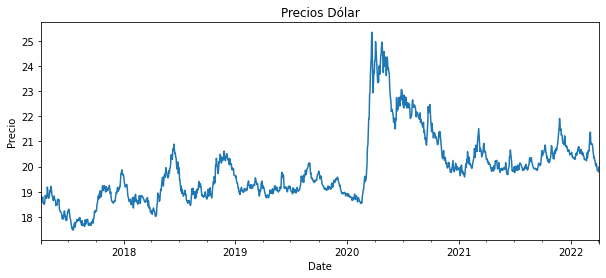

In [ ]:
diariosg['Price'].plot(figsize=(10,4), title='Precios Dólar', ylabel = 'Precio',)
plt.show()

In [ ]:
# p-valor para ver si serie es estacionaria
# ¿La serie es estacionaria?
p_value = adfuller(diariosg['Price'])[1]
print(p_value)

0.070337863916678


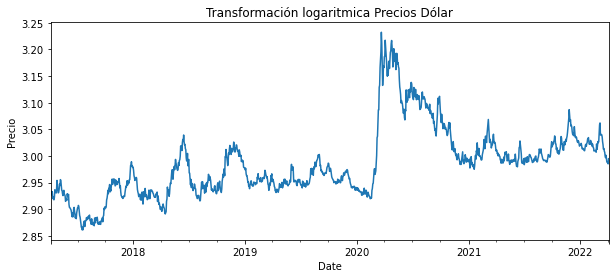

In [ ]:
diariosg['price_log'] = np.log(diariosg['Price'])
diariosg['price_log'].plot(figsize=(10,4), title='Transformación logaritmica Precios Dólar', ylabel = 'Precio',)
plt.show()

In [ ]:
diariosg['retornos_log']= diariosg['price_log'].diff()  # en la diferencia perdemos el primer registro
diariosg.head()

,Price,price_log,retornos_log
Date,,,
2017-04-05,18.8200,2.934920,NaN
2017-04-06,18.7405,2.930687,-0.004233
2017-04-07,18.6688,2.926854,-0.003833
2017-04-10,18.6787,2.927384,0.000530
2017-04-11,18.7813,2.932862,0.005478


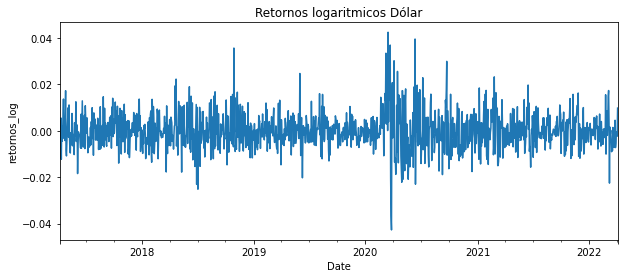

In [ ]:
diariosg['retornos_log'][1:].plot(figsize=(10,4), title='Retornos logaritmicos Dólar', ylabel = 'retornos_log')
plt.show()

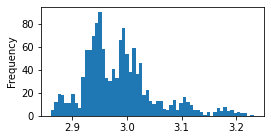

In [ ]:
plt.rc("figure", figsize=(4,2))
diariosg['price_log'].plot.hist(bins=60)
plt.show()

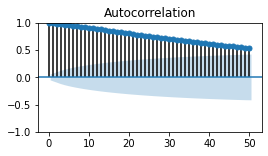

In [ ]:
plot_acf(diariosg['price_log'], lags=50)
plt.show()

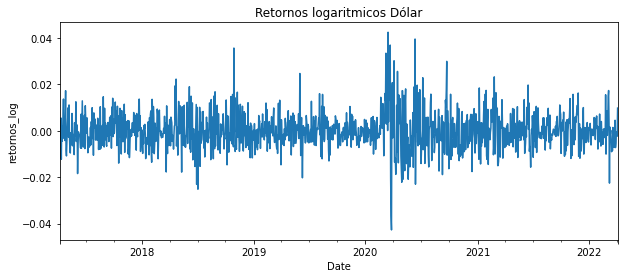

In [ ]:
# COMPARACION plots de retornos_log
diariosg['retornos_log'][1:].plot(figsize=(10,4), title='Retornos logaritmicos Dólar', ylabel = 'retornos_log',)
plt.show()

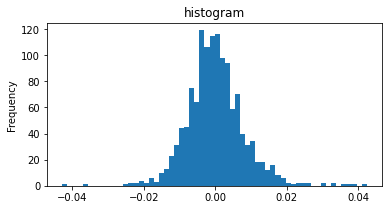

In [ ]:
plt.rc("figure", figsize=(6,3))
diariosg['retornos_log'][1:].plot.hist(bins=60, title='histogram')
plt.show()

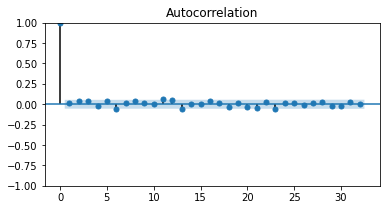

In [ ]:
plot_acf(diariosg['retornos_log'][1:])
plt.show()

In [ ]:
import scipy.stats

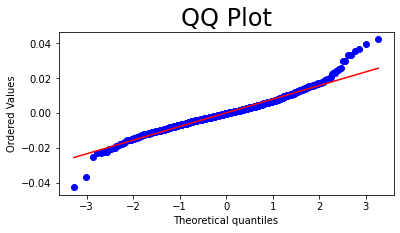

In [ ]:
scipy.stats.probplot(diariosg['retornos_log'][1:], plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

In [ ]:
# ¿La serie retornos log es estacionaria?
p_value = adfuller(diariosg['retornos_log'][1:])[1]
p_value

# SE rechaza hipotesis nula, siendo aceptada que es estacionaria

1.9492035638011684e-15

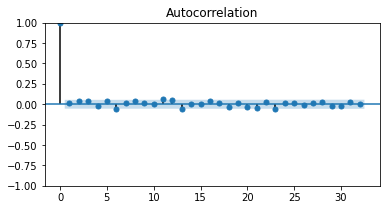

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


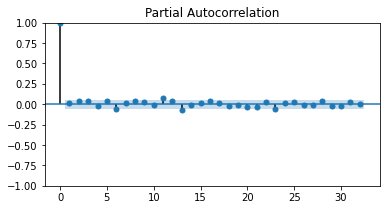

In [ ]:
plt.rc("figure", figsize=(6,3))

plot_acf(diariosg['retornos_log'][1:])
plt.show()

plot_pacf(diariosg['retornos_log'][1:])
plt.show()

In [ ]:
# MODELO ARIMA    # REVISAR SI ES FALSE para precios
model_arma = auto_arima(diariosg['retornos_log'][1:],
                        stationary= True,  stepwise=False, maxiter=200, trace=True,
                        information_criterion='aic', max_order=5)
# start_p=2, start_q=2, d=None, max_p=5, max_q=5 por default

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=-8901.021, Time=0.51 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=-8899.268, Time=0.69 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=-8899.121, Time=0.91 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=-8899.278, Time=0.61 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=-8897.750, Time=0.72 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=-8898.030, Time=2.06 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=-8899.289, Time=0.40 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=-8897.021, Time=0.68 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=-8896.618, Time=1.02 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=-8900.932, Time=1.87 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=-8897.324, Time=1.32 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=-8899.166, Time=0.59 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=-8895.020, Time=0.60 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=-8893.020, Time=0.87 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=-8898.238, Time=1.32

In [ ]:
print(model_arma.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1304
Model:                        SARIMAX   Log Likelihood                4452.511
Date:                Fri, 13 Jan 2023   AIC                          -8901.021
Time:                        00:06:13   BIC                          -8890.675
Sample:                    04-06-2017   HQIC                         -8897.140
                         - 04-05-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.592e-05      0.000      0.204      0.838      -0.000       0.000
sigma2      6.335e-05   1.59e-06     39.874      0.000    6.02e-05    6.65e-05
Ljung-Box (L1) (Q):                   0.27   Jarque-

In [ ]:
model_arma.predict()

2022-04-06    0.000046
2022-04-07    0.000046
2022-04-08    0.000046
2022-04-11    0.000046
2022-04-12    0.000046
2022-04-13    0.000046
2022-04-14    0.000046
2022-04-15    0.000046
2022-04-18    0.000046
2022-04-19    0.000046
Freq: B, dtype: float64

In [ ]:
model_arima = auto_arima(diariosg['price_log'],
                        stationary= False,  stepwise=False, maxiter=200, trace=True,
                        information_criterion='aic',max_order=5)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=-8901.021, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=-8899.268, Time=0.67 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=-8899.121, Time=0.56 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=-8899.278, Time=0.61 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=-8897.750, Time=0.79 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=-8898.059, Time=5.35 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=-8899.289, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=-8897.021, Time=0.78 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=-8896.618, Time=0.97 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=-8900.932, Time=1.55 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=-8897.324, Time=2.08 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=-8899.166, Time=0.63 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=-8895.020, Time=0.58 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=-8893.020, Time=1.16 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=-8898.238, Time=1.98

In [ ]:
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1305
Model:               SARIMAX(0, 1, 0)   Log Likelihood                4452.511
Date:                Fri, 13 Jan 2023   AIC                          -8901.021
Time:                        00:09:31   BIC                          -8890.675
Sample:                    04-05-2017   HQIC                         -8897.140
                         - 04-05-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.592e-05      0.000      0.204      0.838      -0.000       0.000
sigma2      6.335e-05   1.59e-06     39.874      0.000    6.02e-05    6.65e-05
Ljung-Box (L1) (Q):                   0.27   Jarque-

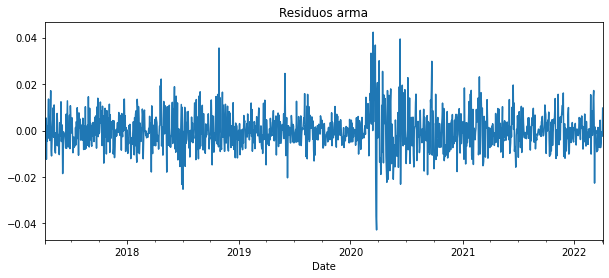

In [ ]:
# Exploración de residuos del modelo ARMA de Retornos

residuos_arma = pd.Series(model_arma.resid(), index = diariosg.index[1:])
residuos_arma.plot(figsize=(10,4), title='Residuos arma')
plt.show()

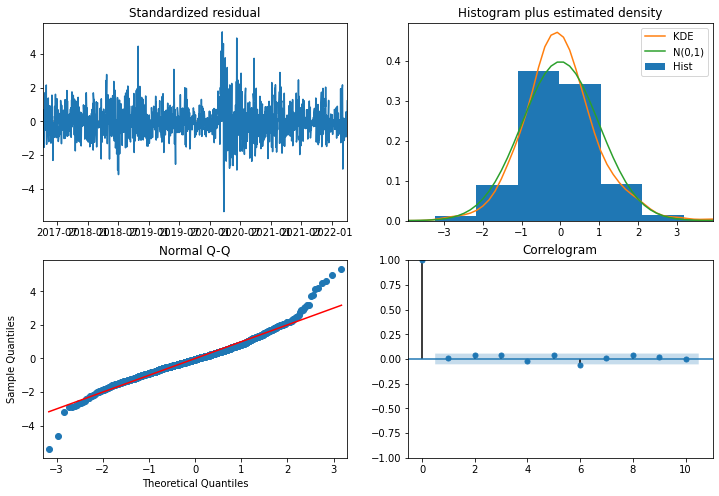

In [ ]:
model_arma.plot_diagnostics(figsize=(12,8), lags=10)
plt.show()

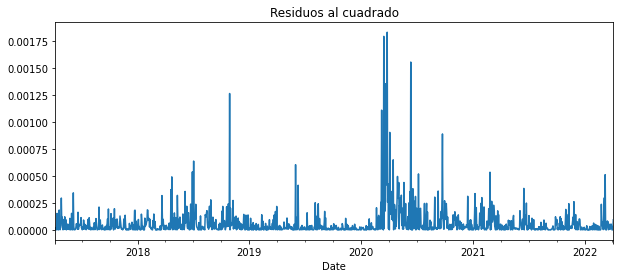

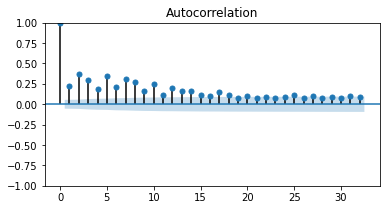

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


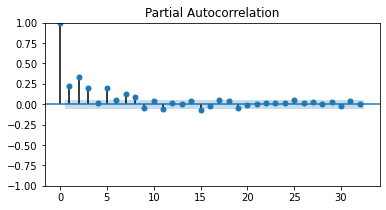

In [ ]:
res2 = pow(residuos_arma,2)

res2.plot(figsize=(10,4), title='Residuos al cuadrado')
plt.show()

plot_acf(res2)
plt.show()

plot_pacf(res2)
plt.show()

In [ ]:
### ARCH  (aprox Desviacion estandar de la serie de tiempo)

garch = arch.arch_model(residuos_arma, p=1, q=0, rescale=False)  # VALOR A Q?
model_garch= garch.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 7858806430.104402
Iteration:      2,   Func. Count:     16,   Neg. LLF: -4431.40051179892
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4431.400508520377
            Iterations: 6
            Function evaluations: 16
            Gradient evaluations: 2


In [ ]:
print(model_garch.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                4431.40
Distribution:                  Normal   AIC:                          -8856.80
Method:            Maximum Likelihood   BIC:                          -8841.28
                                        No. Observations:                 1304
Date:                Fri, Jan 13 2023   Df Residuals:                     1303
Time:                        00:14:38   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -1.3867e-05  2.272e-04 -6.104e-02      0.

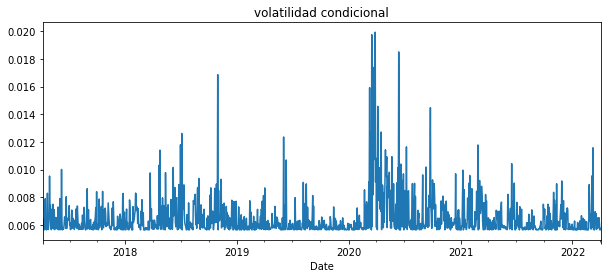

In [ ]:
diariosg['volatilidad_condicional']=np.nan
diariosg['volatilidad_condicional'][1:]=model_garch.conditional_volatility
diariosg['volatilidad_condicional'].plot(figsize=(10,4), title='volatilidad condicional')
plt.show()

In [ ]:
# GARCH (ARCH Generalizado)

garch11 = arch.arch_model(residuos_arma, p=1, q=1, rescale=False)
model_garch11= garch11.fit()

print(model_garch11.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5.7150611109997714e+20
Iteration:      2,   Func. Count:     19,   Neg. LLF: 78509095241419.36
Iteration:      3,   Func. Count:     34,   Neg. LLF: 2.1201693128158333e+18
Iteration:      4,   Func. Count:     47,   Neg. LLF: 16220084628045.768
Iteration:      5,   Func. Count:     62,   Neg. LLF: 20118479.559857197
Iteration:      6,   Func. Count:     75,   Neg. LLF: 1.3210723263356014e+17
Iteration:      7,   Func. Count:     90,   Neg. LLF: 1.805604648904416e+19
Iteration:      8,   Func. Count:    103,   Neg. LLF: 268616805642313.25
Iteration:      9,   Func. Count:    118,   Neg. LLF: 5.4312091111905526e+19
Iteration:     10,   Func. Count:    131,   Neg. LLF: 82460962479090.45
Iteration:     11,   Func. Count:    145,   Neg. LLF: -4593.490272699529
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4593.490271947909
            Iterations: 15
            Function evaluations: 145
      

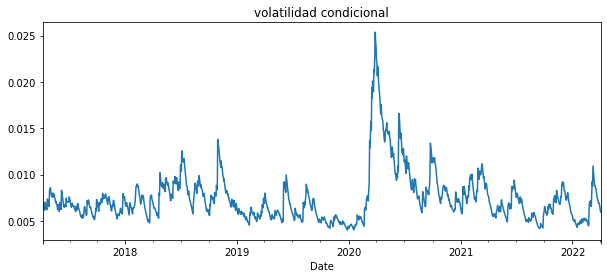

In [ ]:
diariosg['volatilidad_condicional']=np.nan
diariosg['volatilidad_condicional'][1:]=model_garch11.conditional_volatility
diariosg['volatilidad_condicional'].plot(figsize=(10,4), title='volatilidad condicional')
plt.show()

# Value at Risk

In [ ]:
# Riesgo del 5% suponiendo una distribución normal 

In [ ]:
diariosg.columns

Index(['Price', 'price_log', 'retornos_log', 'volatilidad_condicional'], dtype='object')

In [ ]:
lim = diariosg['retornos_log'].quantile(0.05)
lim

-0.011647989361066724

In [ ]:
diariosg['riesgo_5pc_cte'] = np.nan
diariosg['riesgo_5pc_cte'][1:]=lim

In [ ]:
diariosg.head(10)

,Price,price_log,retornos_log,volatilidad_condicional,riesgo_5pc_cte
Date,,,,,
2017-04-05,18.8200,2.934920,NaN,NaN,NaN
2017-04-06,18.7405,2.930687,-0.004233,0.006892,-0.011648
2017-04-07,18.6688,2.926854,-0.003833,0.006687,-0.011648
2017-04-10,18.6787,2.927384,0.000530,0.006477,-0.011648
2017-04-11,18.7813,2.932862,0.005478,0.006184,-0.011648
2017-04-12,18.5513,2.920540,-0.012322,0.006173,-0.011648
2017-04-13,18.5885,2.922543,0.002003,0.007040,-0.011648
2017-04-14,18.5038,2.917976,-0.004567,0.006735,-0.011648
2017-04-17,18.4980,2.917663,-0.000313,0.006566,-0.011648


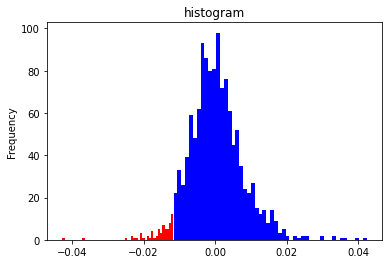

In [ ]:
plt.rc("figure", figsize=(6,4))

diariosg['retornos_log'][lambda x:x>=lim].plot.hist(bins=50, title='histogram', color='blue')
diariosg['retornos_log'][lambda x:x<lim].plot.hist(bins=50, title='histogram', color='r')
plt.show()

In [ ]:
from scipy.stats import norm
lim2 = norm(loc = 0 , scale = 1).ppf(0.05)
lim2

-1.6448536269514729

In [ ]:
diariosg

,Price,price_log,retornos_log,volatilidad_condicional,riesgo_5pc_cte
Date,,,,,
2017-04-05,18.8200,2.934920,NaN,NaN,NaN
2017-04-06,18.7405,2.930687,-0.004233,0.006892,-0.011648
2017-04-07,18.6688,2.926854,-0.003833,0.006687,-0.011648
2017-04-10,18.6787,2.927384,0.000530,0.006477,-0.011648
2017-04-11,18.7813,2.932862,0.005478,0.006184,-0.011648
...,...,...,...,...,...
2022-03-30,19.8560,2.988506,-0.005424,0.006938,-0.011648
2022-03-31,19.8450,2.987952,-0.000554,0.006811,-0.011648
2022-04-01,19.8350,2.987448,-0.000504,0.006489,-0.011648


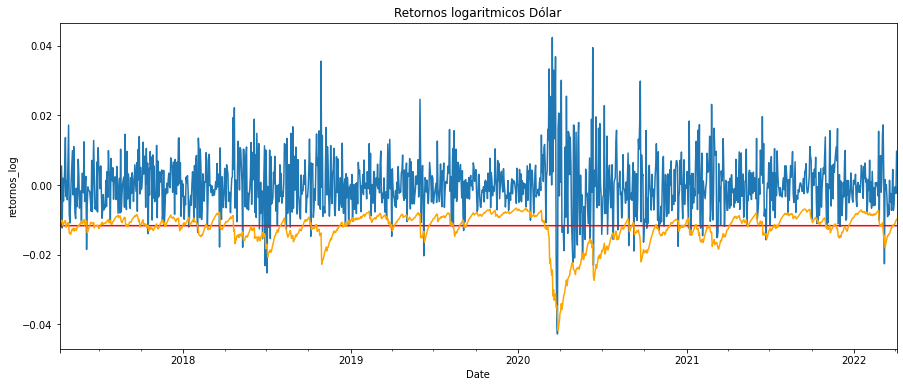

In [ ]:
diariosg['retornos_log'][1:].plot(figsize=(15,6), title='Retornos logaritmicos Dólar', ylabel = 'retornos_log')
diariosg['riesgo_5pc_cte'][1:].plot(c='r')
(diariosg['volatilidad_condicional'][1:]*lim2).plot(c='orange')

plt.show()

# Predicción con ARIMA

Text(0.5, 1.0, 'Predicción del precio con ARIMA')

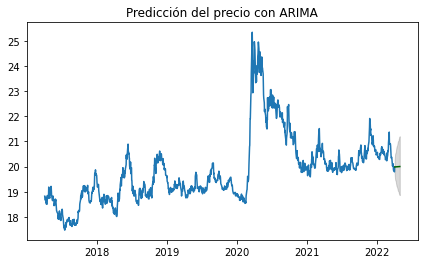

In [ ]:
n_periods = 20
fc_log, confint_log = model_arima.predict(n_periods=n_periods,  return_conf_int=True, alpha=0.1)
fc, confint = np.exp(fc_log), np.exp(confint_log)

# Vamos a crear una serie para graficar más facilmente
ix_fc = pd.date_range( start='2022-04-05', periods=n_periods, freq='B')  # 2022-04-05 es la fecha final a la que le queremos predecir
fc_series = pd.Series(fc, ix_fc )

lower_series = pd.Series(confint[:, 0],  index=ix_fc )
upper_series = pd.Series(confint[:, 1],  index=ix_fc )

# Plot
plt.rc("figure", figsize=(7,4))
plt.plot(diariosg['Price'])

plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Predicción del precio con ARIMA")

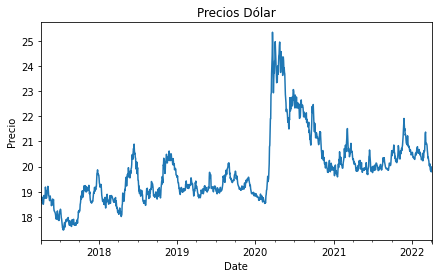

In [ ]:
# Recordemos el original
diariosg['Price'].plot(figsize=(7,4), title='Precios Dólar', ylabel = 'Precio')
plt.show()

# Predicción Garch

In [ ]:
fc_garch = model_garch.forecast(reindex=False, horizon=n_periods)  
fc_garch

**`fc_garch`** es un objeto ARCHModelForcast, entre sus atributos usaremos la media para sumarlo a la predicción de arima.

[documentación](https://arch.readthedocs.io/en/latest/univariate/univariate_volatility_forecasting.html) de la biblioteca arch y el forcasting de volatilidad

In [ ]:
fc_garch.mean

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,h.11,h.12,h.13,h.14,h.15,h.16,h.17,h.18,h.19,h.20
Date,,,,,,,,,,,,,,,,,,,,
2022-04-05,-0.000014,-0.000014,-0.000014,-0.000014,-0.000014,-0.000014,-0.000014,-0.000014,-0.000014,-0.000014,-0.000014,-0.000014,-0.000014,-0.000014,-0.000014,-0.000014,-0.000014,-0.000014,-0.000014,-0.000014


Podemos ver que las predicciones están guardadas en un dataframe 